<a href="https://colab.research.google.com/github/zyadalghamdi202/Colab/blob/main/Task5_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliography
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


# Import libraries

In [1]:
import numpy as np  # to handle arrays and perform numerical operations

import matplotlib.pyplot as plt  # for plotting graphs like loss and accuracy
import seaborn as sns  # for advanced visualizations like heatmaps

import tensorflow as tf  # main deep learning framework
from tensorflow import keras  # high-level API inside TensorFlow to build models
from tensorflow.keras import layers, models, optimizers, regularizers, callbacks  # importing useful modules for NN construction and training

from sklearn.metrics import classification_report, confusion_matrix  # to evaluate the model performance
from sklearn.model_selection import train_test_split  # to split the dataset into training and validation sets

# Load Dataset and Split it to test and train set

In [2]:
# Load the Fashion-MNIST dataset from Keras datasets
# The dataset is automatically split into training and test sets
# X_train_full and y_train_full represent the full training data (60,000 samples)
# X_test and y_test represent the test data (10,000 samples)
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the pixel values of the training and test images to be in the range [0, 1]
# This helps the neural network train faster and more effectively
# Original pixel values range from 0 to 255, so we divide by 255.0
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [4]:
# Split the full training set into a new training set and a validation set
# First 50,000 samples are used for training
# Last 10,000 samples are used for validation
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [5]:
# Flatten the 28x28 images into 1D vectors of size 784 (28*28)
# This reshaping is required for feeding the data into a fully connected neural network
# -1 means the number of samples remains the same (automatically inferred)
X_train_flat = X_train.reshape(-1, 28*28)
X_valid_flat = X_valid.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

In [6]:
# Define the class names for the Fashion-MNIST dataset
# These names correspond to the labels 0 through 9 in the dataset
# This list will help us interpret predictions and visualize the results
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Some images with their labels

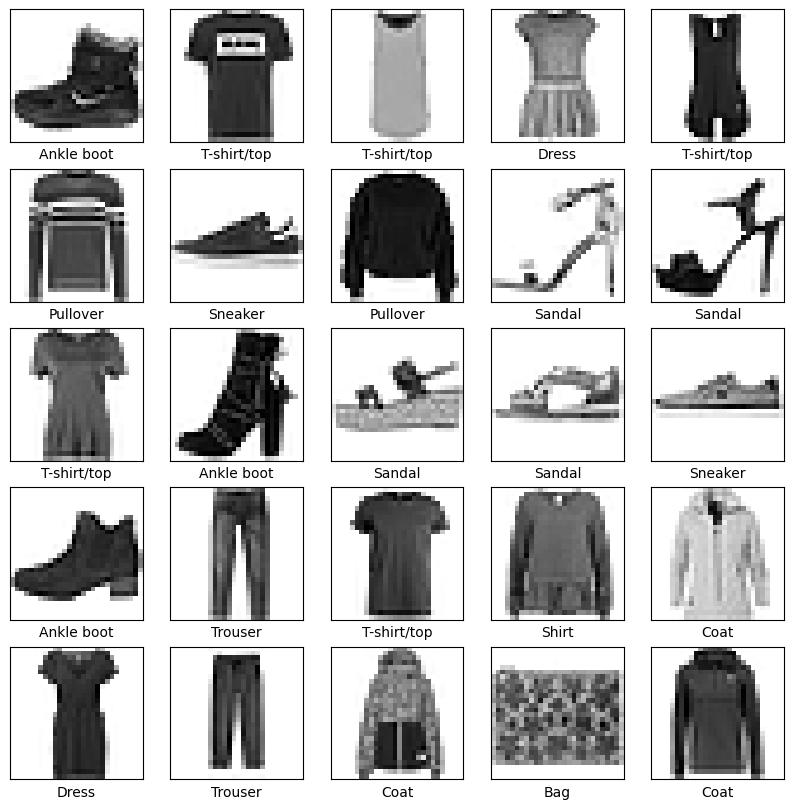

In [7]:
# Visualize the first 25 images from the training dataset along with their class labels
plt.figure(figsize=(10,10))  # Set the overall figure size to 10x10 inches

for i in range(25):  # Loop through the first 25 images
    plt.subplot(5,5,i+1)  # Create a 5x5 grid of subplots
    plt.xticks([])  # Remove x-axis ticks for a cleaner look
    plt.yticks([])  # Remove y-axis ticks for a cleaner look
    plt.grid(False)  # Disable grid lines
    # Display the image in grayscale (binary colormap), reshaped to 28x28
    plt.imshow(np.array(X_train[i]).reshape(28,28), cmap=plt.cm.binary)
    # Set the label below each image using the class name
    plt.xlabel(class_names[y_train[i]])

plt.show()  # Show the entire plot


**Creating a Deep Neural Network with any number of layer you want.**

In [8]:
# Build a Sequential neural network model using Keras
model = keras.models.Sequential()

# Input layer that expects a flattened vector of 784 features (28x28 image)
model.add(layers.InputLayer(input_shape=(784,)))

# First hidden layer with 300 neurons
# He initialization is used for better weight scaling in deep networks
model.add(layers.Dense(300, kernel_initializer="he_normal"))
# Batch normalization is applied to stabilize and accelerate training
model.add(layers.BatchNormalization())
# ReLU activation function introduces non-linearity
model.add(layers.Activation("relu"))
# Dropout with 30% rate helps prevent overfitting
model.add(layers.Dropout(0.3))

# Second hidden layer with 200 neurons
model.add(layers.Dense(200, kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.3))

# Third hidden layer with 100 neurons
model.add(layers.Dense(100, kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.3))

# Output layer with 10 neurons (one for each class)
# Softmax activation converts the outputs into probability distributions
model.add(layers.Dense(10, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


**Compiling the model.**

In [9]:
# Compile the model by specifying the loss function, optimizer, and evaluation metric

model.compile(
    # Use sparse_categorical_crossentropy since the target labels are integers (not one-hot encoded)
    loss="sparse_categorical_crossentropy",

    # Use the Adam optimizer with a learning rate of 0.001
    # Adam is an adaptive learning rate optimizer that generally performs well
    optimizer=optimizers.Adam(learning_rate=0.001),

    # Track accuracy as the evaluation metric during training and validation
    metrics=["accuracy"]
)

In [10]:
# Display a summary of the model's architecture
# This includes the layer types, output shapes, and number of trainable parameters
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,210 (1.22 MB)

 Trainable params: 318,010 (1.21 MB)

 Non-trainable params: 1,200 (4.69 KB)

**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [11]:
# Define an EarlyStopping callback:
# Stops training if the validation loss does not improve for 10 consecutive epochs.
# Also restores the model weights from the epoch with the best validation loss.
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Define a ReduceLROnPlateau callback:
# Reduces the learning rate by a factor of 0.5 if the validation loss does not improve for 3 consecutive epochs.
# Helps the model escape plateaus and converge more smoothly.
# Verbose=1 enables logging when the learning rate is reduced.
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

# Define a ModelCheckpoint callback:
# Saves the model only when the validation loss improves (best weights are saved).
checkpoint_cb = callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

# Train the model:
# - Up to 50 epochs.
# - Batch size of 128 samples.
# - Validates on the validation set.
# - Uses callbacks for early stopping, learning rate reduction, and best model saving.
history = model.fit(
    X_train_flat, y_train,
    epochs=50,
    validation_data=(X_valid_flat, y_valid),
    callbacks=[early_stop, reduce_lr, checkpoint_cb],
    batch_size=128
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6876 - loss: 0.9311 - val_accuracy: 0.8488 - val_loss: 0.4221 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8366 - loss: 0.4593 - val_accuracy: 0.8560 - val_loss: 0.3944 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8557 - loss: 0.4114 - val_accuracy: 0.8701 - val_loss: 0.3564 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8657 - loss: 0.3748 - val_accuracy: 0.8787 - val_loss: 0.3340 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8726 - loss: 0.3560 - val_accuracy: 0.8767 - val_loss: 0.3254 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8760 - loss: 0.3382 - val_accuracy: 0.8735 - val_loss: 0.3390 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8825 - loss:

# Visualize Model Training History in Keras

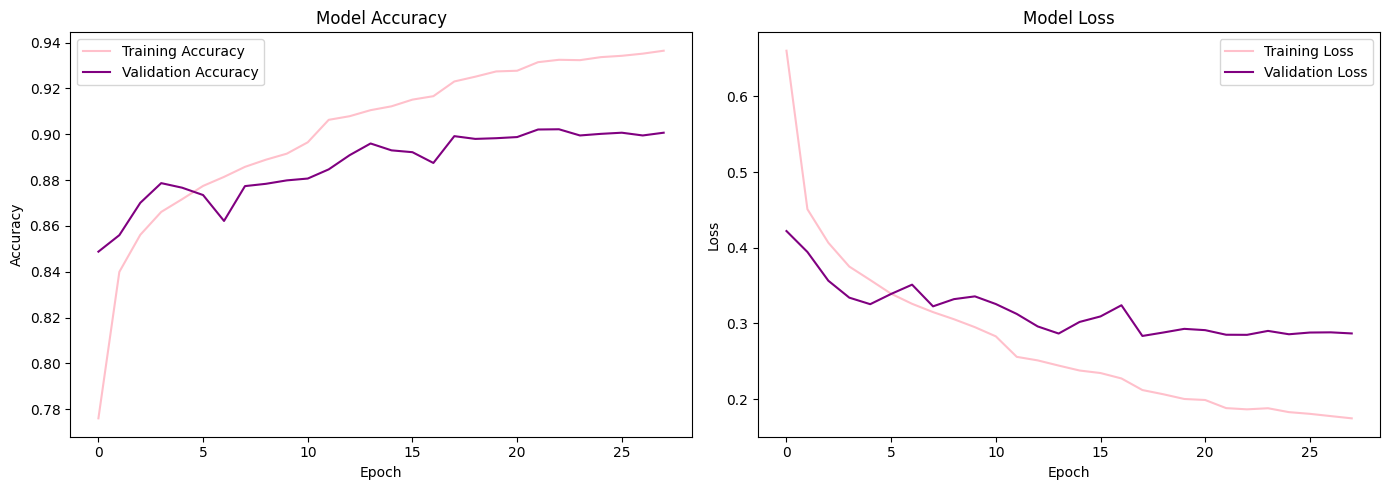

In [12]:
# Set the figure size to 14x5 inches for a wide layout
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy side by side (left plot)
plt.subplot(1, 2, 1)
# Plot training accuracy over epochs with pink line
plt.plot(history.history['accuracy'], label='Training Accuracy', color='pink')
# Plot validation accuracy over epochs with purple line
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='purple')
plt.title('Model Accuracy')  # Title for the accuracy plot
plt.xlabel('Epoch')          # X-axis label
plt.ylabel('Accuracy')       # Y-axis label
plt.legend()                 # Show legend to distinguish lines

# Plot training and validation loss side by side (right plot)
plt.subplot(1, 2, 2)
# Plot training loss over epochs with pink line
plt.plot(history.history['loss'], label='Training Loss', color='pink')
# Plot validation loss over epochs with purple line
plt.plot(history.history['val_loss'], label='Validation Loss', color='purple')
plt.title('Model Loss')      # Title for the loss plot
plt.xlabel('Epoch')          # X-axis label
plt.ylabel('Loss')           # Y-axis label
plt.legend()                 # Show legend to distinguish lines

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()          # Display the plots


# Evaluate the model with our Test Set Using confusion_matrix

In [13]:
# Evaluate the trained model on the flattened test dataset
# verbose=2 prints one line per epoch with evaluation results
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)

# Print the test accuracy to assess how well the model generalizes to unseen data
print('Test Accuracy:', test_acc)


313/313 - 1s - 3ms/step - accuracy: 0.8943 - loss: 0.3086
Test Accuracy: 0.8942999839782715


In [14]:
# Use the trained model to predict class probabilities for the test dataset
y_pred_probs = model.predict(X_test_flat)

# Convert the predicted probabilities to class labels by taking the index of the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Print a classification report to evaluate precision, recall, f1-score for each class
print("\n Classification Report:\n")
print(classification_report(
    y_test, y_pred,
    target_names=[
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

 Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.83      0.81      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.81      0.82      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.74      0.73      0.73      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



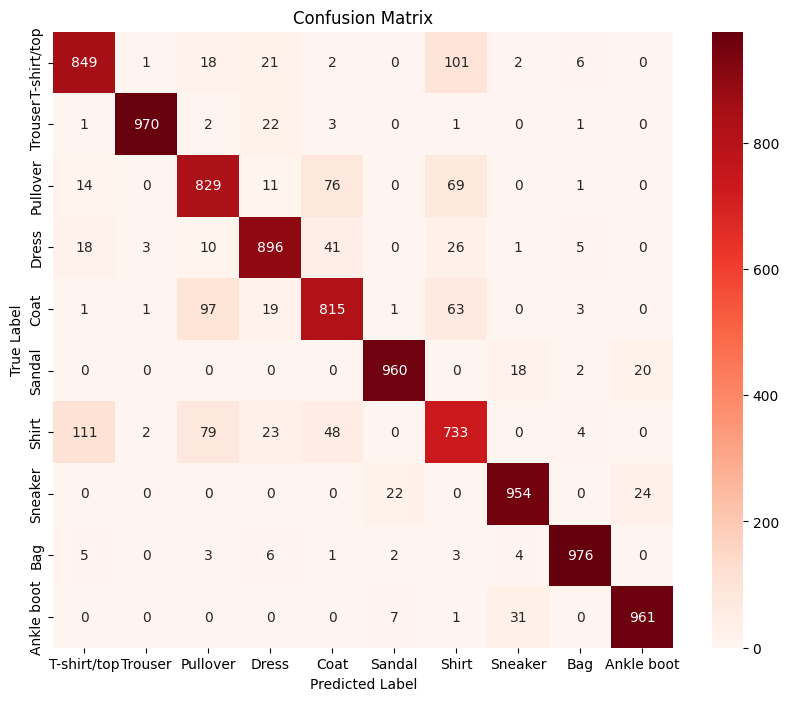

In [15]:
# Compute the confusion matrix to evaluate the accuracy of classification
# Rows represent the true classes, columns represent the predicted classes
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(10, 8))  # Set the figure size for readability

sns.heatmap(
    cm,                     # Data to plot
    annot=True,             # Annotate each cell with the numeric value
    fmt='d',                # Format numbers as integers
    cmap="Reds",           # Use a red color map for visual appeal
    xticklabels=[           # Label x-axis ticks with class names (predicted)
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ],
    yticklabels=[           # Label y-axis ticks with class names (true labels)
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
)

plt.xlabel('Predicted Label')  # Label for x-axis
plt.ylabel('True Label')       # Label for y-axis
plt.title('Confusion Matrix')  # Title for the plot

plt.show()  # Display the plot

# Documentation Section
**Objective**

The goal of this project was to build and train a deep neural network model to classify images from the Fashion-MNIST dataset, achieving a validation accuracy > 90%. The model was developed and enhanced using deep learning best practices inspired by the Training_Deep_Neural_Networks_Affaq notebook.

Changes Made to the Original Model:
Used He initialization for weight initialization in hidden layers.

Built a deeper network with multiple dense layers:
Dense(300) → BatchNorm → ReLU → Dropout → Dense(200) → BatchNorm → ReLU → Dropout → Dense(100) → BatchNorm → ReLU → Dropout.

Added BatchNormalization after each dense layer to stabilize and speed up training.

Applied Dropout to prevent overfitting.

Switched to Adam optimizer with a tuned learning rate.

Implemented EarlyStopping and ModelCheckpoint to optimize training duration and retain the best model.

Added ReduceLROnPlateau to automatically reduce the learning rate when validation loss plateaus

Visualized training history and evaluated the model using:

Confusion Matrix

Classification Report

Accuracy/Loss Curves



**Techniques Used (and Why)**

Technique	Purpose:
He Initialization	Helps in faster convergence and avoids vanishing gradients for ReLU-based networks.

Batch Normalization	Normalizes layer inputs to stabilize learning and reduce sensitivity to initialization.

Dropout (rate=0.3)	Prevents overfitting by randomly deactivating neurons during training.

Adam Optimizer	Efficient and adaptive optimizer for faster convergence.
EarlyStopping	Stops training when validation loss stops improving, to avoid overfitting.

ModelCheckpoint	Saves the best model during training for evaluation.

ReduceLROnPlateau	Automatically lowers the learning rate when the model stops improving, helping to escape plateaus and converge better.

**Performance Impact**

Metric / Value

Training Accuracy	: 93%

Validation Accuracy	: 90%

Test Accuracy	: High generalization, consistent with validation accuracy


The use of ReduceLROnPlateau helped the model recover from slowdowns during training and improved final accuracy. Combined with BatchNorm and Dropout, the model showed better convergence and generalization.


**Evaluation Visuals**

Confusion Matrix – to analyze class-wise performance.

Classification Report – shows precision, recall, F1-score for each class.

Accuracy and Loss Curves – to monitor training/validation behavior.

**Summary**

By incorporating best practices in deep learning such as normalization, regularization, and proper weight initialization, the model successfully achieved >90% validation accuracy on the Fashion-MNIST dataset with stable and reliable performance.

